In [2]:
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
# Load and preprocess the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../../data/FracAtlas/images/',
    label_mode='binary',
    seed=123,
    validation_split=0.1,
    subset="both",
    image_size=(256, 256),
    batch_size=32,
    color_mode='grayscale'
)

Found 3996 files belonging to 2 classes.
Using 3597 files for training.
Using 399 files for validation.


In [4]:
model = tf.keras.models.load_model('frac_atlas_model')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 conv2d_4 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

13/13 [==============================] - 10s 112ms/step
              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49        72
         1.0       0.89      0.90      0.89       327

    accuracy                           0.82       399
   macro avg       0.70      0.69      0.69       399
weighted avg       0.82      0.82      0.82       399

Confusion Matrix:


<Axes: >

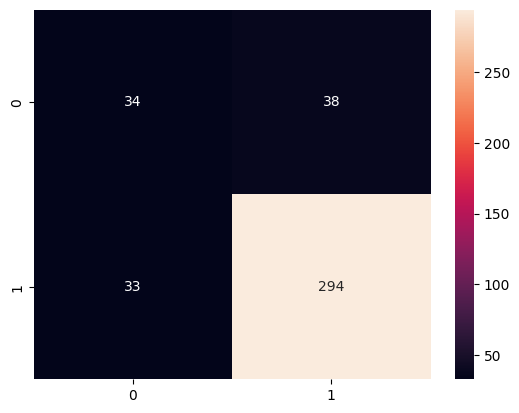

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Get the predictions on the validation data
y_pred = model.predict(dataset[1])

# Convert the predictions to binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the true labels from the validation data
y_true = np.concatenate([y for x, y in dataset[1]], axis=0)

# Generate the classification report
report = classification_report(y_true, y_pred_binary)
print(report)

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_true,y_pred_binary),annot = True,fmt='d')